# 角点检测   

## 1.1 Harris角点检测  
✔️ OpenCV 中的函数 cv2.cornerHarris() 可以用来进行角点检测，参数如下：

- img - 输入图像。
- blockSize - 角点检测中领域像素的大小。
- ksize - Sobel 求导中使用的窗口大小
- k - Harris 角点检测方程中的自由参数,取值参数为 [0.04,0.06].

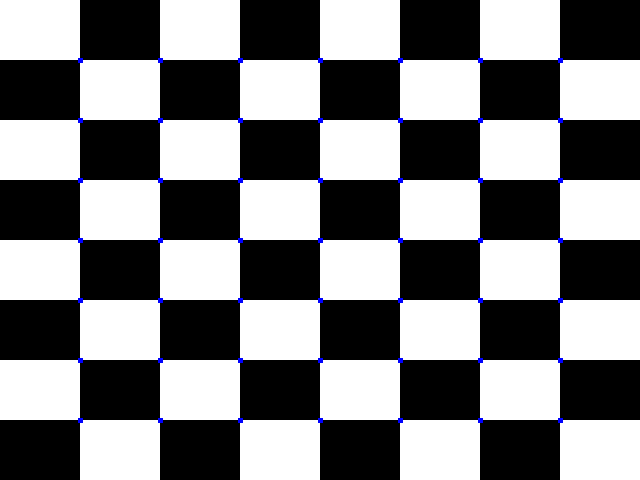

In [4]:
import cv2
import numpy as np 
from PIL import Image

filename = './images/chessboard.png'
# filename = '../data/chessboard-3.png'
# filename = '../data/corner-detection.jpg'

img = cv2.imread(filename)
img = cv2.resize(img, (640, 480))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

# 输入图像必 是 float32 最后一个参数在 0.04 到 0.05 之间
dst = cv2.cornerHarris(gray, 2, 3, 0.04)
# result is dilated for marking the corners, not important
dst = cv2.dilate(dst, None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst > 0.01 * dst.max()] = [0, 0, 255]
Image.fromarray(img)

##  1.2 亚像素级的角点检测  
✔️ OpenCV中角点检测的结果实际不够精准，因为真实的计算中有些位置可能是在浮点数的空间内才最大值，这样就需要我们通过给定的响应值，在像素邻域空间进行拟合，实现亚像素级别的角点检测。 

```
cv2.cornerSubPix(
    InputArray image,
    InputOutputArray corners,
    Size winSize,
    Size zeroZone,
    TermCriteria criteria 
)
```
- image单通道输入图像，八位或者浮点数。
- corners是输入输出的关键点坐标集合。
- winSize表示插值计算时候窗口大小。
- zeroZone表示搜索区域中间的dead。 region边长的一半，有时用于避免自相关矩阵的奇异性。如果值设为(-1,-1)则表示没有这个区域。
- criteria角点精准化迭代过程的终止条件

In [ ]:
import numpy as np
import cv2 as cv


def process(image, opt=1):
    # Detecting corners
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    corners = cv.goodFeaturesToTrack(gray, 100, 0.05, 10)
    print(len(corners))
    for pt in corners:
        print(pt)
        b = np.random.random_integers(0, 256)
        g = np.random.random_integers(0, 256)
        r = np.random.random_integers(0, 256)
        x = np.int32(pt[0][0])
        y = np.int32(pt[0][1])
        cv.circle(image, (x, y), 5, (int(b), int(g), int(r)), 2)

    # detect sub-pixel
    winSize = (3, 3)
    zeroZone = (-1, -1)

    # Stop condition
    criteria = (cv.TERM_CRITERIA_EPS + cv.TermCriteria_COUNT, 40, 0.001)
    # Calculate the refined corner locations
    corners = cv.cornerSubPix(gray, corners, winSize, zeroZone, criteria)
    # display
    for i in range(corners.shape[0]):
        print(" -- Refined Corner [", i, "]  (", corners[i, 0, 0], ",", corners[i, 0, 1], ")")
    return image

 

filename = './images/chessboard.png'
img = cv2.imread(filename)
result = process(src)
Image.fromarray(result)